# Exploratory Data Analysis

------------------------------------------------------------------------------------------------------

In [37]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy.stats import zscore
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [38]:
fashiondata = pd.read_csv('fashiondata.csv')
#Importing datasets separated by Brand category and numerical values
highstreetnum = pd.read_csv('highstreetnum.csv')
megacouturenum = pd.read_csv('megacouturenum.csv')
designernum = pd.read_csv('designernum.csv')
smallcouturenum = pd.read_csv('smallcouturenum.csv')

#Importing datasets separated by Brand category and numerical values (cleaned to remove outliers)
highstreetnum_wo_outliers = pd.read_csv('highstreetnum_wo_outliers.csv')
megacouturenum_wo_outliers = pd.read_csv('megacouturenum_wo_outliers.csv')
designernum_wo_outliers = pd.read_csv('designernum_wo_outliers.csv')
smallcouturenum_wo_outliers = pd.read_csv('smallcouturenum_wo_outliers.csv')

In [39]:
condition = (fashiondata.dtypes == np.int64) | (fashiondata.dtypes == np.float64)
fashiondatanum = fashiondata.loc[:, condition]
print("Data dimensions of our main dataset : ", fashiondata.shape) 

Data dimensions of our main dataset :  (24752, 33)


### Univariate exploration of our response variable - Likes

In [40]:
#importing likes the variable into a dataframe & describing it
likes = pd.DataFrame(fashiondata['Likes'])
likes.describe()

,Likes
count,24752.000000
mean,101.622132
std,871.011061
min,0.000000
25%,10.000000
50%,22.000000
75%,53.000000
max,101922.000000


In [41]:
print("Data dims : ", likes.size)

Data dims :  24752


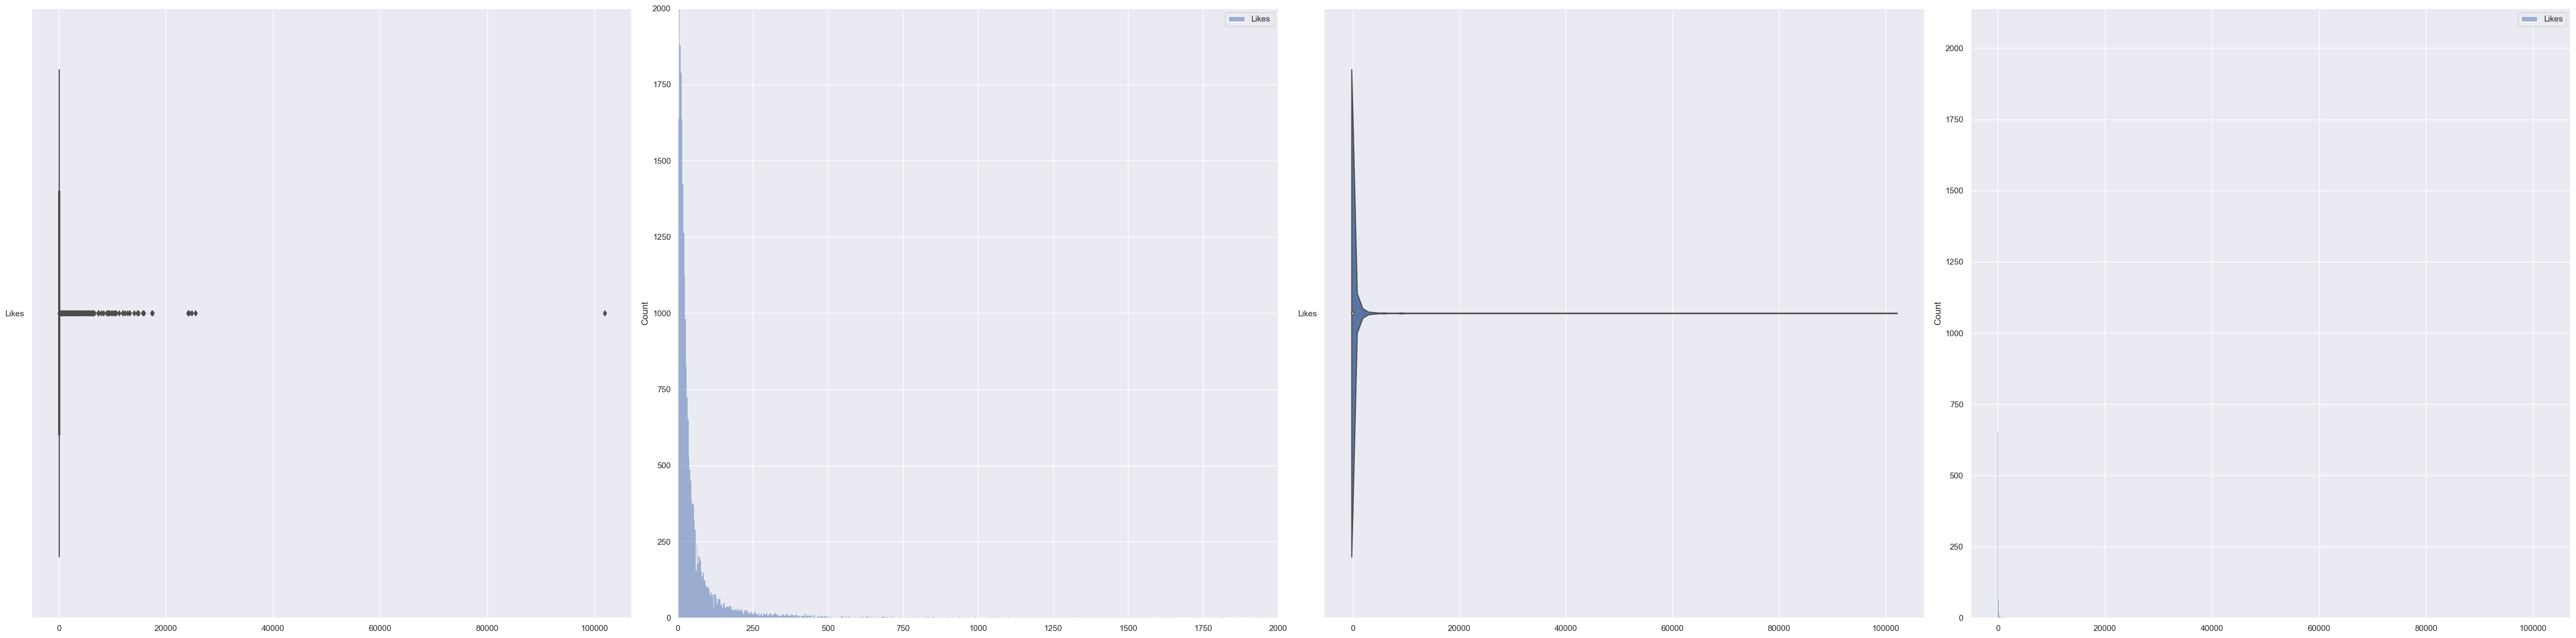

In [42]:
fig, axes = plt.subplots(1, 4, figsize=(48, 12))

sb.boxplot(data=likes, orient="h", ax=axes[0])
sb.histplot(data=likes, ax=axes[1])
axes[1].set_xlim(0, 2000)
axes[1].set_ylim(0, 2000)
sb.violinplot(data=likes, orient="h", ax=axes[2])
sb.histplot(data=likes, ax=axes[3])

plt.tight_layout()
plt.show()

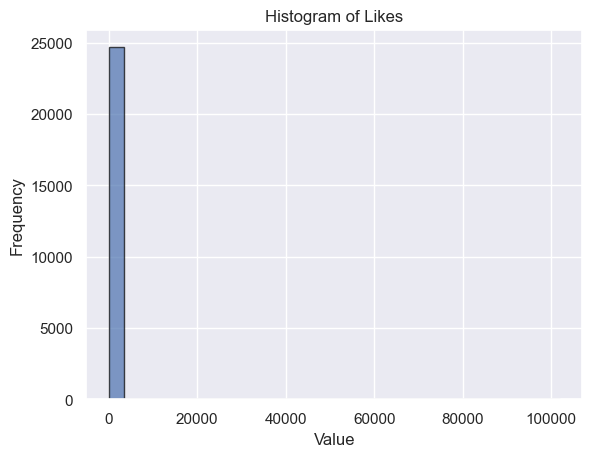

In [43]:
plt.hist(likes, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Likes')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

From these numerical data & visual representations, we can gather that Likes, our response variable, is highly concentrated, for the majority, in a range from 10-50. However, there is a subtantial amount of outliers that are much higher than 50 and skew the dataset. One of our goals to exploit this disparity to find out the weight these outliers hold when compared to other variables for each brand category

## Correlations for our raw data set

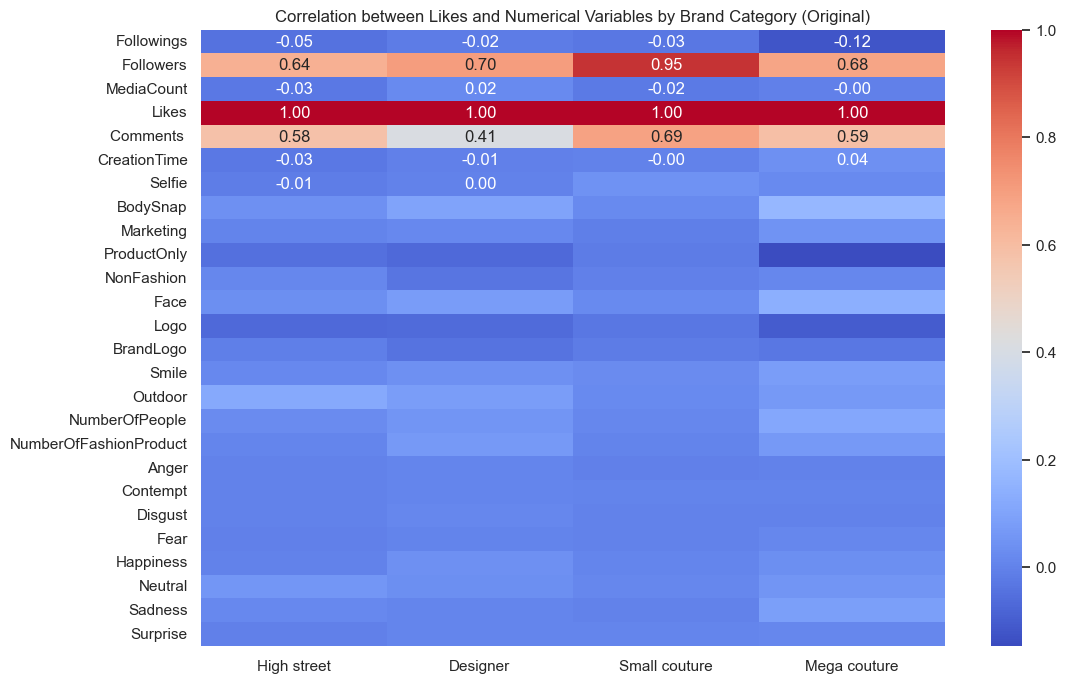

In [44]:
# Original dataset with outliers
fashion_num_columns = fashiondata.select_dtypes(include=[np.number]).columns.tolist()
fashiondata[fashion_num_columns] = fashiondata[fashion_num_columns].apply(pd.to_numeric, errors='coerce')
fashion_brand_categories = fashiondata['BrandCategory'].unique()

# Initialize dictionary for original dataset
fashion_brand_category_correlations = {}

# Calculate correlations for each category in original dataset
for category in fashion_brand_categories:
    category_data = fashiondata[fashiondata['BrandCategory'] == category]
    correlations = category_data[fashion_num_columns].corrwith(category_data['Likes'])
    fashion_brand_category_correlations[category] = correlations

# Convert dictionary to DataFrame for original dataset
fashion_brand_category_correlations_dataframe = pd.DataFrame(fashion_brand_category_correlations)

# Visualize correlations for original dataset
plt.figure(figsize=(12, 8))
sb.heatmap(fashion_brand_category_correlations_dataframe, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Likes and Numerical Variables by Brand Category (Raw)')
plt.show()



This chart reveals significant takeaways about the features of our data set: immediately we can tell most of our variable share little to no correlation such as emotions and most image features. This may be indicatve of each variable's significance in predicting how a post may perform in popularity. It may also underscore the limitations in our dataset due to the smaller time drame an dlimited number of posts.

An interesting observation in the initial analysis with the dataset made us want to explore the relationship between the response (Likes) and the predictor variables for each of the four brand categories when analysed without outliers. Right away, comments and followers have stronger correlations with likes for each brand category than most variables, hence when exploring the relationship between variables and likes per brand category, we will be focusing on these two variables primarily.

Therefore, the four dataframes will be created: for each of the brand categories, analysis and evaluation will be done before and after accounting for the outliers found using IQR.

## Correlations for our cleaned dataset

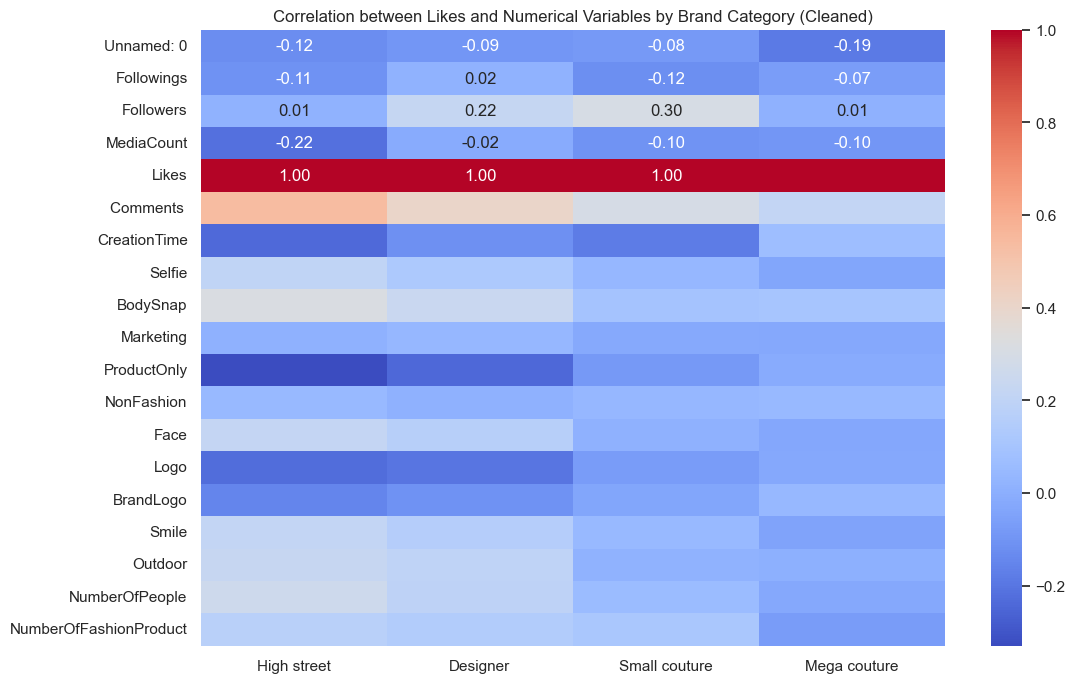

In [51]:
# Initialize dictionary for cleaned datasets
fashion_brand_category_correlations_clean = {}

# Calculate correlations for each category in cleaned datasets
for category, df in zip(fashion_brand_categories, dataframes):
    
    # Drop constant columns
    df = df.loc[:, (df != df.iloc[0]).any()]
    
    # Remove rows with missing values
    df = df.dropna()
    
    # Update fashion_num_columns after data cleaning
    fashion_num_columns_clean = df.select_dtypes(include=[np.number]).columns.tolist()
    
    correlations = df[fashion_num_columns_clean].corrwith(df['Likes'])
    fashion_brand_category_correlations_clean[category] = correlations

# Convert dictionary to DataFrame for cleaned datasets
fashion_brand_category_correlations_clean_dataframe = pd.DataFrame(fashion_brand_category_correlations_clean)

# Visualize correlations for cleaned datasets
plt.figure(figsize=(12, 8))
heatmap = sb.heatmap(fashion_brand_category_correlations_clean_dataframe, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Likes and Numerical Variables by Brand Category (Cleaned)')
plt.show()

When outliers are removed, right away, correlation values drop accross the board - indicating the weight outliers play in predicting popularity of a post according to certain metrics. However, comments still bear a medium to strong correlation with likes even after outlier removal in most brand categories. This is unlike Followers, a metric that had even stronger correlations, implying it's correlation may depend more on outliers unlike Comments.

The poor correlation values discourage any further explorations into this dataset; Comments is the only variable we can observe here with a discernibly high correlation and hencee, we will not be exploring the cleaned datasets for brand categories anymore.

---

## High Street

In [58]:
highstreet_likes_w_outliers=pd.DataFrame(highstreetnum['Likes'])
highstreet_followers_w_outliers=pd.DataFrame(highstreetnum['Followers'])
highstreet_comments_w_outliers=pd.DataFrame(highstreetnum['Comments '])
highstreet_outdoor_w_outliers=pd.DataFrame(highstreetnum['Outdoor'])

In [71]:
top_correlations = {}
category = 'High street'
# Sort correlations for the specified category and select the top 3
top_correlations[category] = fashion_brand_category_correlations_dataframe[category].sort_values(ascending=False).head(3)
# Print the top correlations for the specified brand category
print(f"\nTop correlations for {category}:")
print(top_correlations[category])


Top correlations for High street:
Likes        1.000000
Followers    0.643606
Comments     0.583350
Name: High street, dtype: float64


### Visualizing Likes in High Street

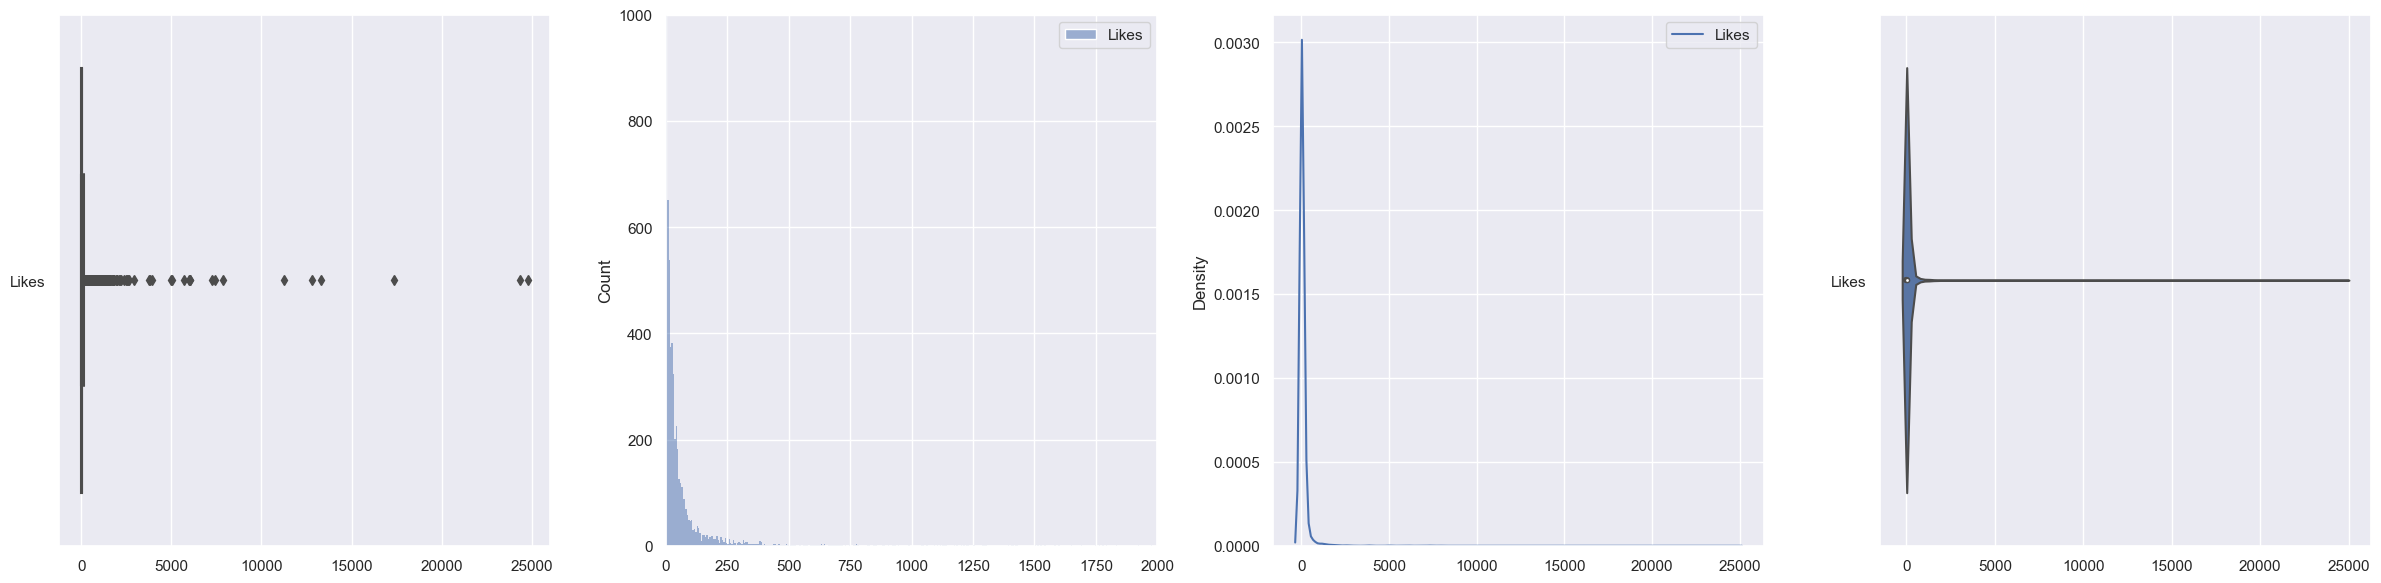

In [59]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sb.boxplot(data=highstreet_likes_w_outliers, orient="h", ax=axs[0])
sb.histplot(data=highstreet_likes_w_outliers, ax=axs[1])
axs[1].set_xlim(0, 2000) 
axs[1].set_ylim(0,1000) 
sb.kdeplot(data=highstreet_likes_w_outliers, ax=axs[2])
sb.violinplot(data=highstreet_likes_w_outliers, orient="h", ax=axs[3])
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Visualizing Followers in High Street

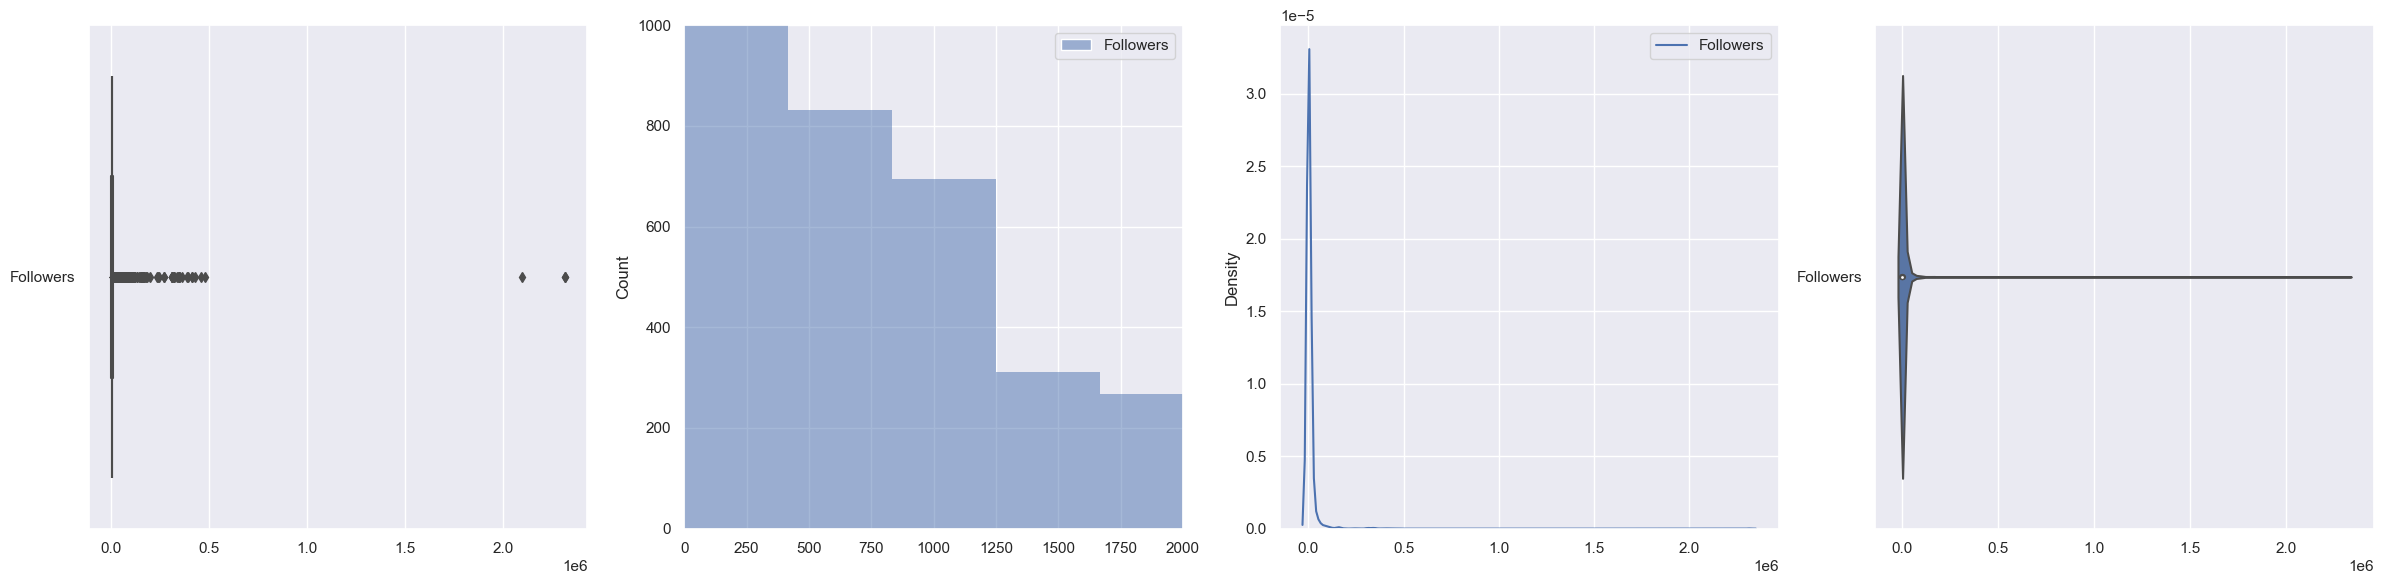

In [60]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sb.boxplot(data=highstreet_followers_w_outliers, orient="h", ax=axs[0])
sb.histplot(data=highstreet_followers_w_outliers, ax=axs[1])
axs[1].set_xlim(0, 2000) 
axs[1].set_ylim(0,1000) 
sb.kdeplot(data=highstreet_followers_w_outliers, ax=axs[2])
sb.violinplot(data=highstreet_followers_w_outliers, orient="h", ax=axs[3])
plt.tight_layout()  
plt.show()


### Visualizing Comments in High Street

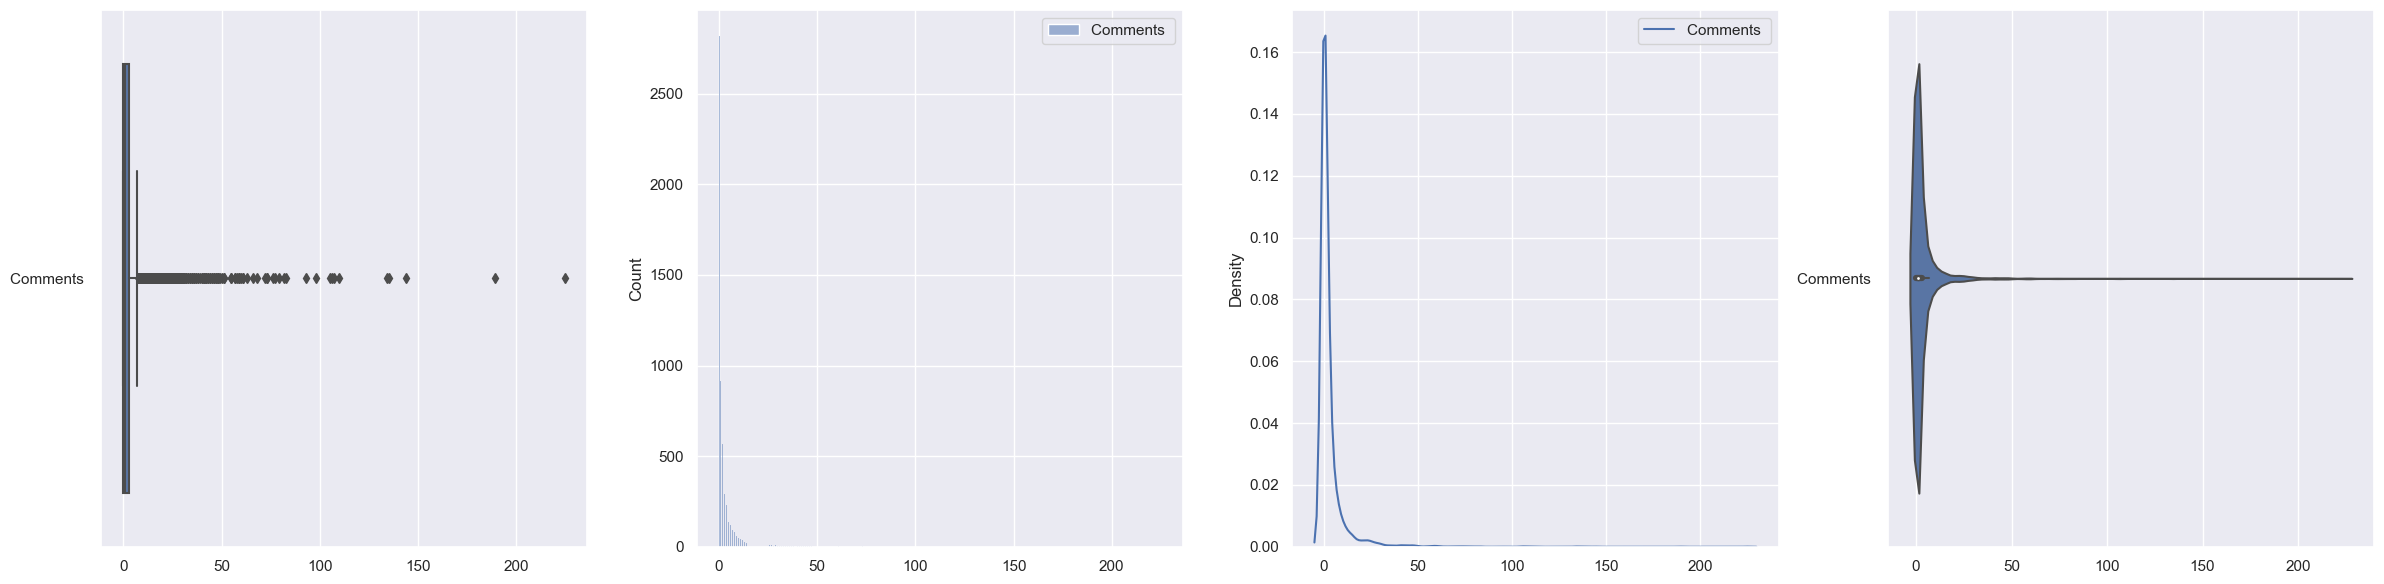

In [61]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sb.boxplot(data=highstreet_comments_w_outliers, orient="h", ax=axs[0])
sb.histplot(data=highstreet_comments_w_outliers, ax=axs[1])
sb.kdeplot(data=highstreet_comments_w_outliers, ax=axs[2])
sb.violinplot(data=highstreet_comments_w_outliers, orient="h", ax=axs[3])
plt.tight_layout()  
plt.show()

---

## Designer

In [64]:
designer_likes_w_outliers=pd.DataFrame(designernum['Likes'])
designer_followers_w_outliers=pd.DataFrame(designernum['Followers'])
designer_comments_w_outliers=pd.DataFrame(designernum['Comments '])
designer_bodysnap_w_outliers=pd.DataFrame(designernum['BodySnap'])


In [70]:
top_correlations = {}
category = 'Designer'

# Sort correlations for the specified category and select the top 3
top_correlations[category] = fashion_brand_category_correlations_dataframe[category].sort_values(ascending=False).head(3)

# Print the top correlations for the specified brand category
print(f"\nTop correlations for {category}:")
print(top_correlations[category])


Top correlations for Designer:
Likes        1.000000
Followers    0.701463
Comments     0.412699
Name: Designer, dtype: float64


### Visualizing Likes in Designer

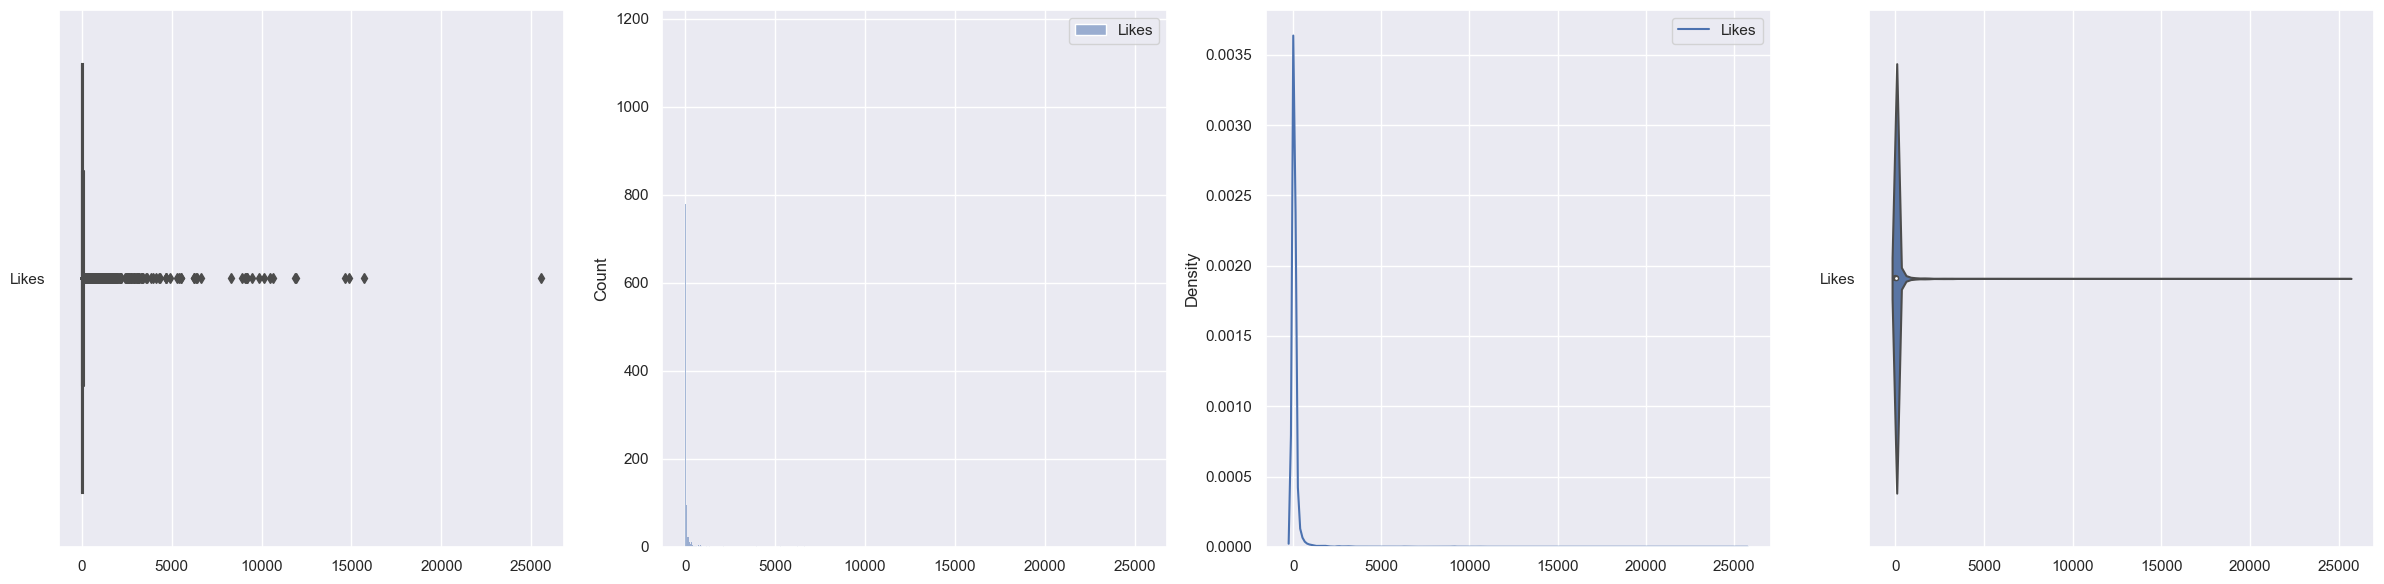

In [67]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sb.boxplot(data=designer_likes_w_outliers, orient="h", ax=axs[0])
sb.histplot(data=designer_likes_w_outliers, ax=axs[1])
sb.kdeplot(data=designer_likes_w_outliers, ax=axs[2])
sb.violinplot(data=designer_likes_w_outliers, orient="h", ax=axs[3])
plt.tight_layout()  
plt.show()

### Visualizing Followers in Designer

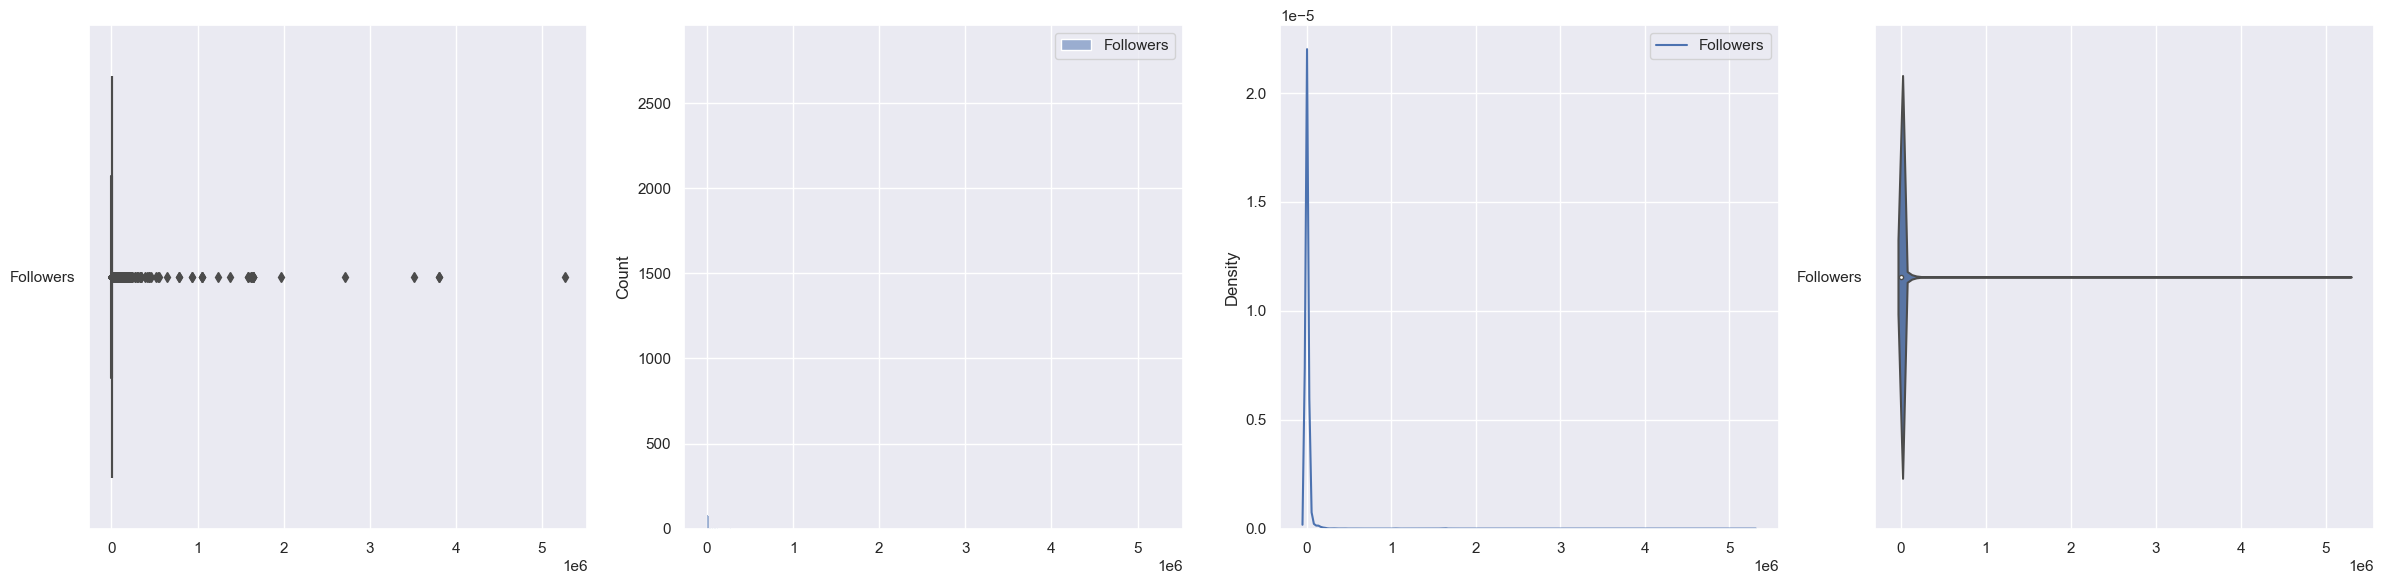

In [68]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sb.boxplot(data=designer_followers_w_outliers, orient="h", ax=axs[0])
sb.histplot(data=designer_followers_w_outliers, ax=axs[1])
sb.kdeplot(data=designer_followers_w_outliers, ax=axs[2])
sb.violinplot(data=designer_followers_w_outliers, orient="h", ax=axs[3])
plt.tight_layout()
plt.show()

### Visualizing Comments in Designer

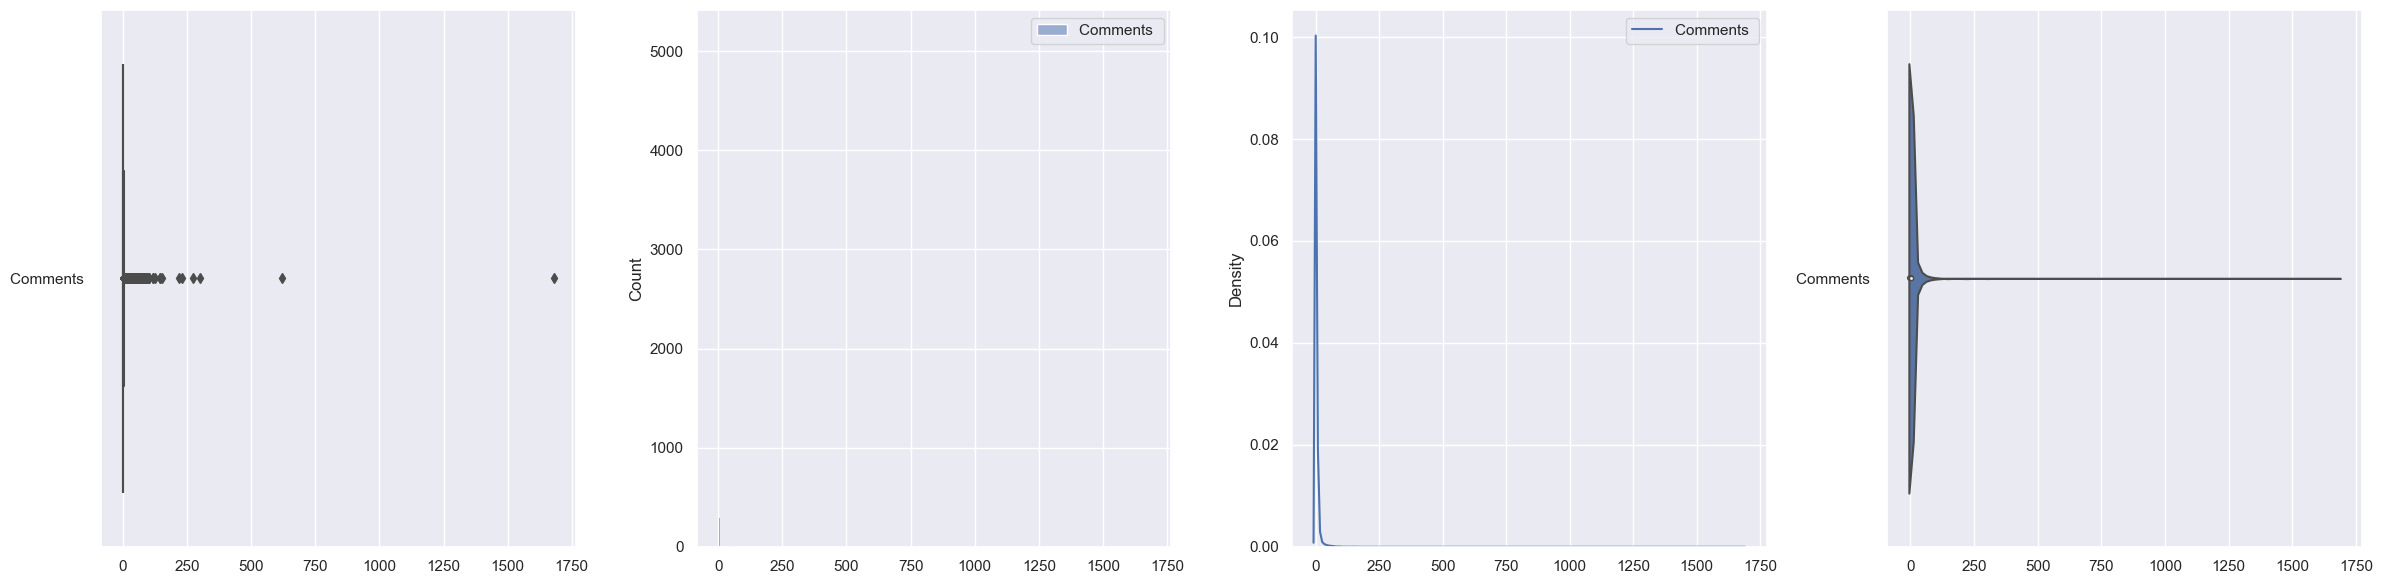

In [69]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sb.boxplot(data=designer_comments_w_outliers, orient="h", ax=axs[0])
sb.histplot(data=designer_comments_w_outliers, ax=axs[1])
sb.kdeplot(data=designer_comments_w_outliers, ax=axs[2])
sb.violinplot(data=designer_comments_w_outliers, orient="h", ax=axs[3])
plt.tight_layout()
plt.show()

----

## Small Couture

In [72]:
smallcouture_likes_w_outliers=pd.DataFrame(smallcouturenum['Likes'])
smallcouture_followers_w_outliers=pd.DataFrame(smallcouturenum['Followers'])
smallcouture_comments_w_outliers=pd.DataFrame(smallcouturenum['Comments '])

In [73]:
top_correlations = {}
category = 'Small couture'

# Sort correlations for the specified category and select the top 3
top_correlations[category] = fashion_brand_category_correlations_dataframe[category].sort_values(ascending=False).head(3)

# Print the top correlations for the specified brand category
print(f"\nTop correlations for {category}:")
print(top_correlations[category])


Top correlations for Small couture:
Likes        1.000000
Followers    0.946084
Comments     0.689398
Name: Small couture, dtype: float64


### Visualizing Likes in Small Couture

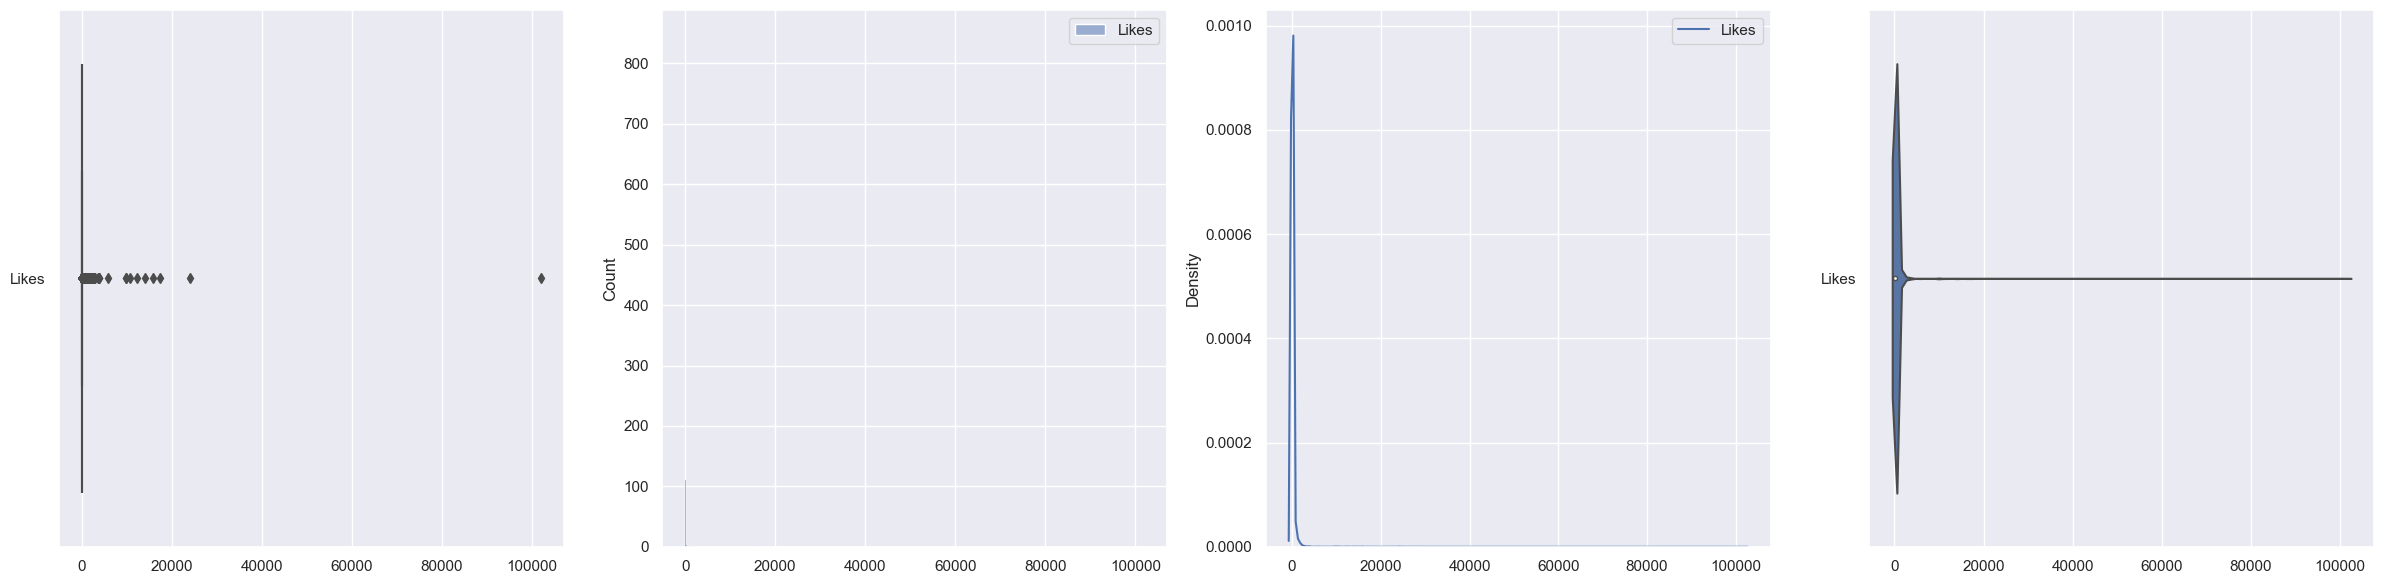

In [74]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sb.boxplot(data=smallcouture_likes_w_outliers, orient="h", ax=axs[0])
sb.histplot(data=smallcouture_likes_w_outliers, ax=axs[1])
sb.kdeplot(data=smallcouture_likes_w_outliers, ax=axs[2])
sb.violinplot(data=smallcouture_likes_w_outliers, orient="h", ax=axs[3])
plt.tight_layout()
plt.show()

### Visualizing Followers in Small Couture

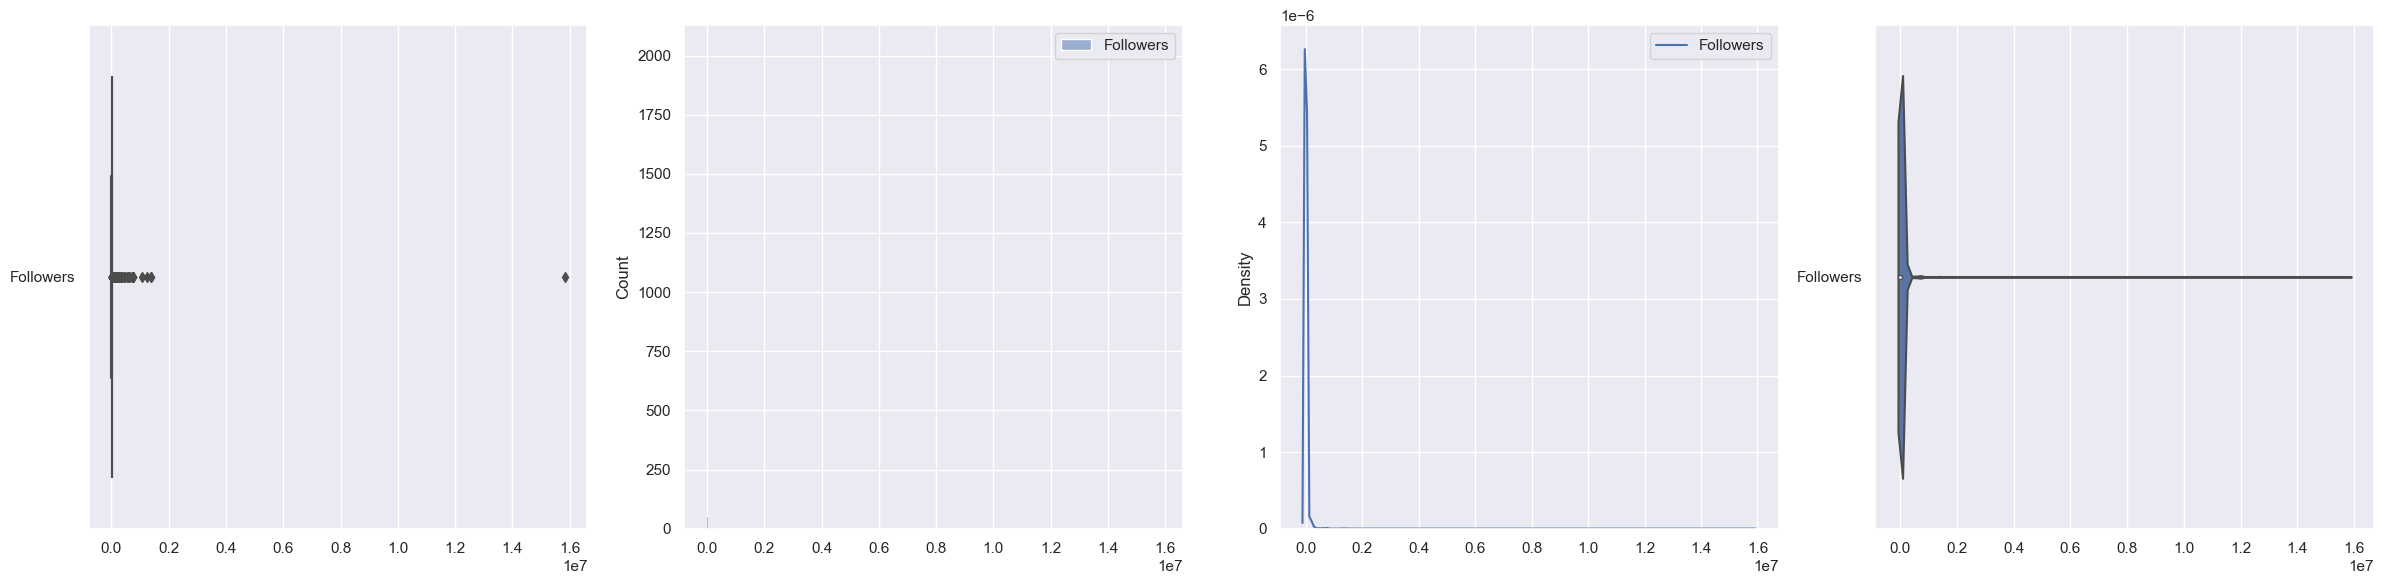

In [75]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sb.boxplot(data=smallcouture_followers_w_outliers, orient="h", ax=axs[0])
sb.histplot(data=smallcouture_followers_w_outliers, ax=axs[1])
sb.kdeplot(data=smallcouture_followers_w_outliers, ax=axs[2])
sb.violinplot(data=smallcouture_followers_w_outliers, orient="h", ax=axs[3])
plt.tight_layout()
plt.show()

### Visualizing Comments in Small Couture

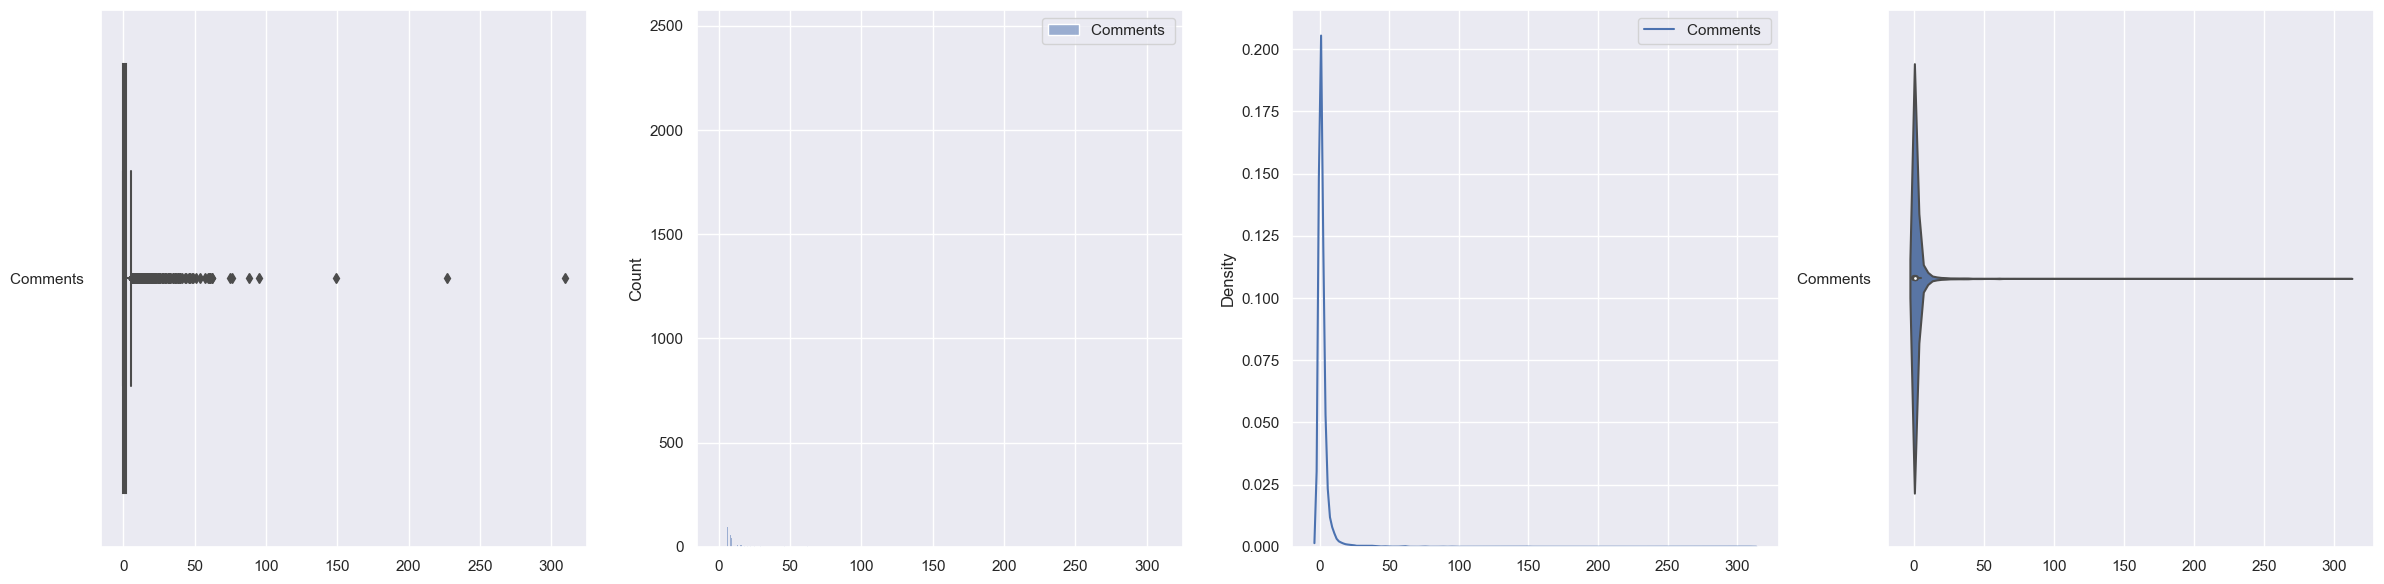

In [76]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sb.boxplot(data=smallcouture_comments_w_outliers, orient="h", ax=axs[0])
sb.histplot(data=smallcouture_comments_w_outliers, ax=axs[1])
sb.kdeplot(data=smallcouture_comments_w_outliers, ax=axs[2])
sb.violinplot(data=smallcouture_comments_w_outliers, orient="h", ax=axs[3])
plt.tight_layout()
plt.show()

---

## Mega Couture

In [81]:
megacouture_likes_w_outliers=pd.DataFrame(megacouturenum['Likes'])
megacouture_followers_w_outliers=pd.DataFrame(megacouturenum['Followers'])
megacouture_comments_w_outliers=pd.DataFrame(megacouturenum['Comments '])

In [82]:
top_correlations = {}
category = 'Mega couture'

# Sort correlations for the specified category and select the top 3
top_correlations[category] = fashion_brand_category_correlations_dataframe[category].sort_values(ascending=False).head(3)

# Print the top correlations for the specified brand category
print(f"\nTop correlations for {category}:")
print(top_correlations[category])


Top correlations for Mega couture:
Likes        1.000000
Followers    0.678127
Comments     0.588612
Name: Mega couture, dtype: float64


### Visualizing Likes in Mega Couture

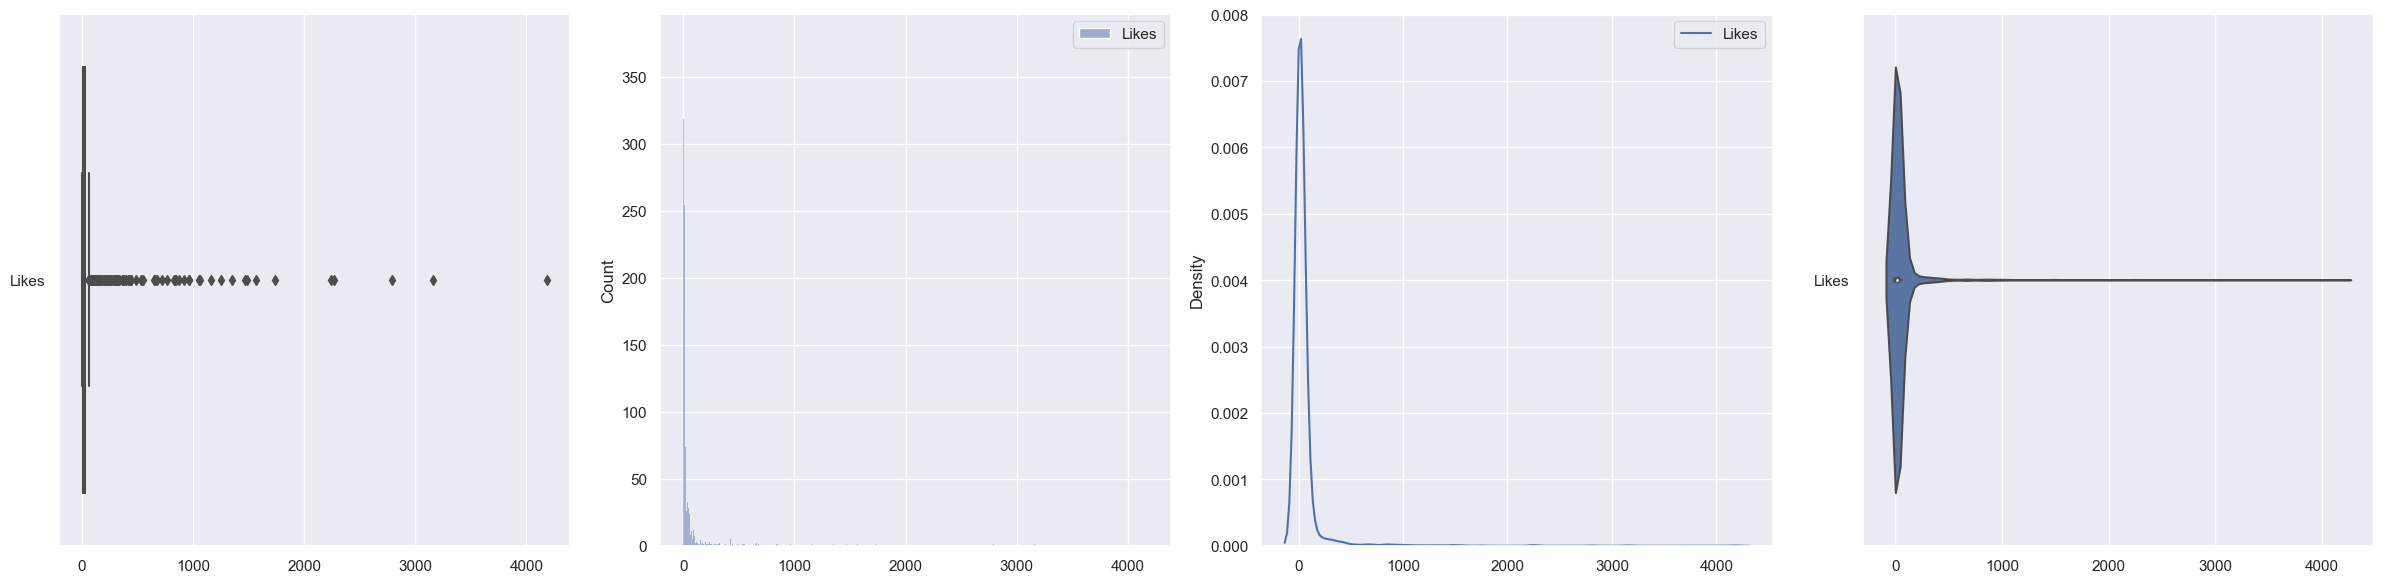

In [84]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sb.boxplot(data=megacouture_likes_w_outliers, orient="h", ax=axs[0])
sb.histplot(data=megacouture_likes_w_outliers, ax=axs[1])
sb.kdeplot(data=megacouture_likes_w_outliers, ax=axs[2])
sb.violinplot(data=megacouture_likes_w_outliers, orient="h", ax=axs[3])
plt.tight_layout()
plt.show()




## Visualizing Followers in Mega Couture

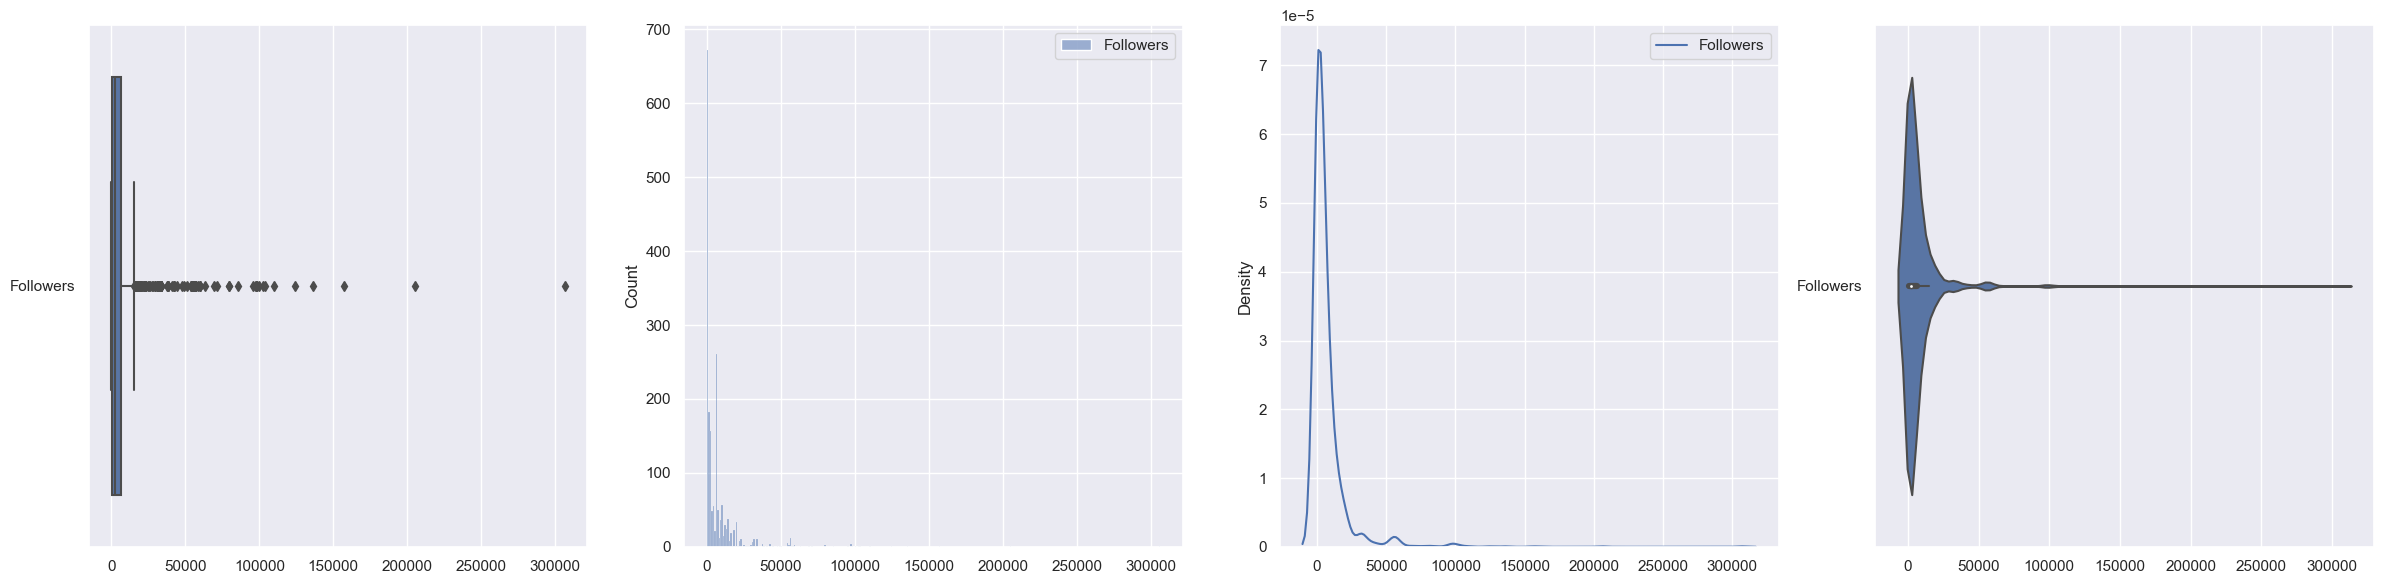

In [86]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sb.boxplot(data=megacouture_followers_w_outliers, orient="h", ax=axs[0])
sb.histplot(data=megacouture_followers_w_outliers, ax=axs[1])
sb.kdeplot(data=megacouture_followers_w_outliers, ax=axs[2])
sb.violinplot(data=megacouture_followers_w_outliers, orient="h", ax=axs[3])
plt.tight_layout()
plt.show()

## Visualizing Comments in Mega Couture

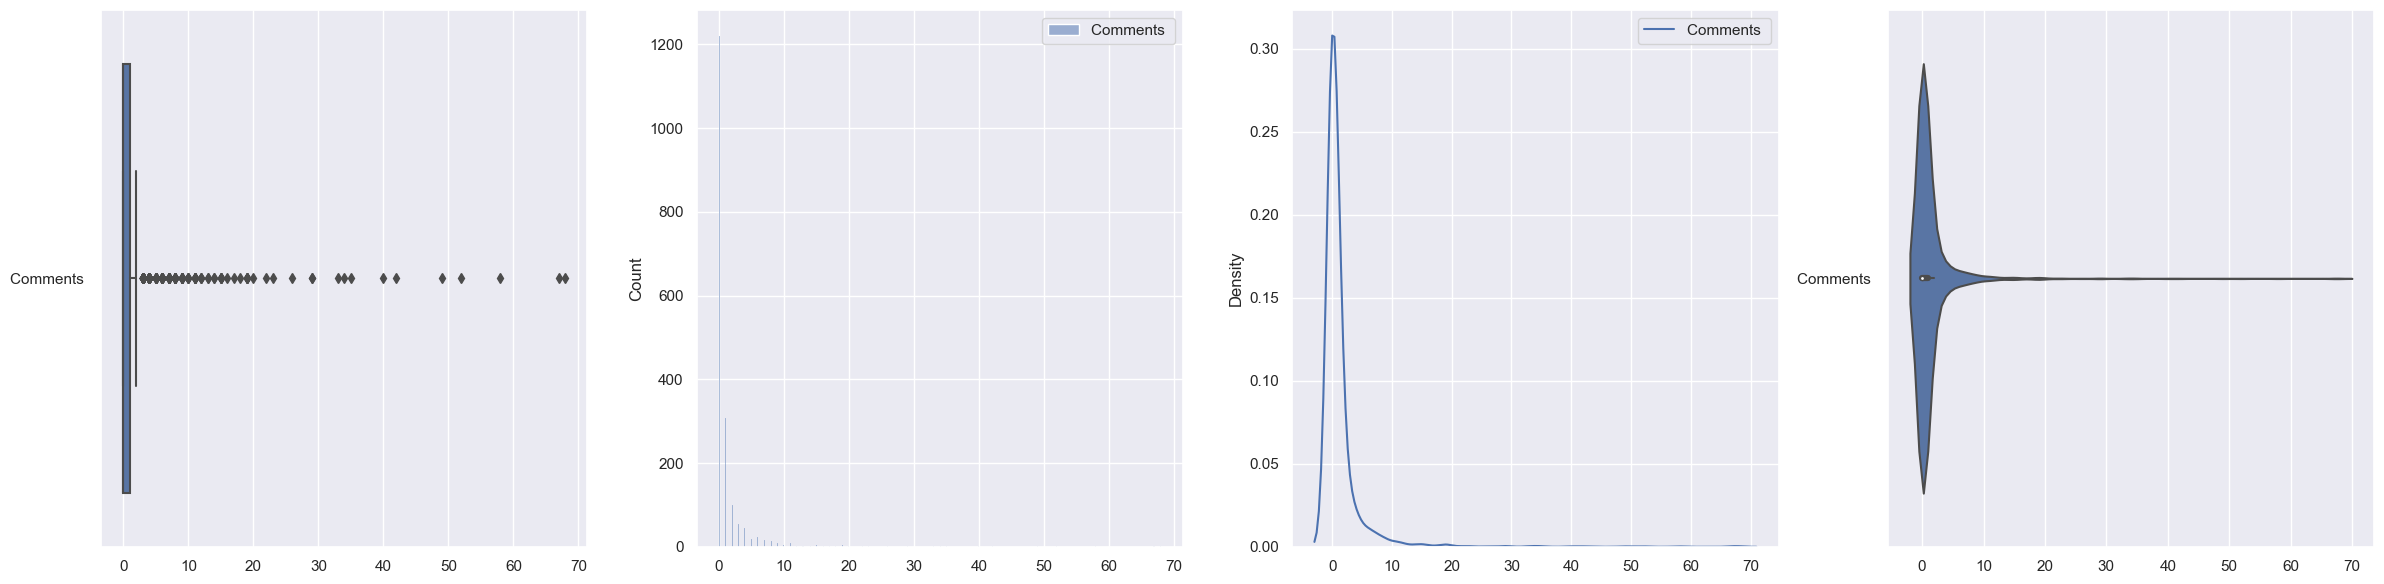

In [85]:
fig, axs = plt.subplots(1, 4, figsize=(24, 6))
sb.boxplot(data=megacouture_comments_w_outliers, orient="h", ax=axs[0])
sb.histplot(data=megacouture_comments_w_outliers, ax=axs[1])
sb.kdeplot(data=megacouture_comments_w_outliers, ax=axs[2])
sb.violinplot(data=megacouture_comments_w_outliers, orient="h", ax=axs[3])
plt.tight_layout()
plt.show()